Basics:
1. Return
2. Compounding
3. Annualizing

In [2]:
#created 2 lists of imaginary stocks
prices_abc = [8.70, 8.91, 8.71, 8.69, 8.82, 8.92, 9.00]
prices_xyz = [6.50, 6.52, 6.57, 6.67, 6.63, 6.68, 6.69]

Returns given from time $t$ until time $t+1$ can be represented by the formula:

$$
R_{t,t+1}=\frac{P_{t+1}-P_t}{P_t}
$$

Alternately, if we want to simplify the numerator, we can see that this becomes

$$
R_{t,t+1}=\frac{P_{t+1}}{P_t}-1
$$

Convert lists to numpy vectors to perform vector operations

In [4]:
import numpy as np
prices_abc  = np.array(prices_abc) #convert to numpy array
prices_abc

array([8.7 , 8.91, 8.71, 8.69, 8.82, 8.92, 9.  ])

In [6]:
prices_abc[:-1]

array([8.7 , 8.91, 8.71, 8.69, 8.82, 8.92])

In [ ]:
#divide prices by previous prices to get returns
returns_abc = prices_abc[1:] / prices_abc[:-1] - 1
#prices_abc[1:] gives us prices from day 1 to day 6
#prices_abc[:-1] gives us prices from day 0 to day 5

#dividing the arrays will get the returns

returns_abc

array([ 0.02413793, -0.02244669, -0.00229621,  0.01495972,  0.01133787,
        0.00896861])

Returns are in daily amounts

**granularity** of our data is driven by what type of trading strategy we are considering executing. 

**High Frequency Trading** involves capitalizing on small market movements.
**long-term portfolio construction** is where we hold onto several proven stocks for a long period of time.

In [ ]:
import pandas as pd
#turn data into pandas dataframe
prices = pd.DataFrame({"ABC": prices_abc, "XYZ": prices_xyz})

In [8]:
prices

,ABC,XYZ
0,8.70,6.50
1,8.91,6.52
2,8.71,6.57
3,8.69,6.67
4,8.82,6.63
5,8.92,6.68
6,9.00,6.69


In [ ]:
prices.iloc[1:]/prices.iloc[:-1] - 1
#will not work because it will try to align the indices of the rows

,ABC,XYZ
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,NaN,NaN


Iloc - Integer location

start at the first row and take every column. Make sure to put .values.

In [13]:
#this is now a 2D numpy array
prices.iloc[1:].values

array([[8.91, 6.52],
       [8.71, 6.57],
       [8.69, 6.67],
       [8.82, 6.63],
       [8.92, 6.68],
       [9.  , 6.69]])

In [14]:
returns = prices.iloc[1:].values/prices.iloc[:-1] - 1
returns

,ABC,XYZ
0,0.024138,0.003077
1,-0.022447,0.007669
2,-0.002296,0.015221
3,0.014960,-0.005997
4,0.011338,0.007541
5,0.008969,0.001497


Bottom code shifts prices to make it cleaner, making the size of the Dataframe the same as the one containing the ticker values.

In [16]:
returns = prices/prices.shift(1) -1
returns

,ABC,XYZ
0,NaN,NaN
1,0.024138,0.003077
2,-0.022447,0.007669
3,-0.002296,0.015221
4,0.014960,-0.005997
5,0.011338,0.007541
6,0.008969,0.001497


**Standard deviation**: how spread out your datapoints are. Square root of the variance.

**Variance**: find mean of dataset and calculate the difference between each data point and the mean, square each of these deviations, sum them together, and divide by the sum of the # of data points

In [19]:
print(returns.mean(), "\n")
print(returns.std())

ABC    0.005777
XYZ    0.004835
dtype: float64 

ABC    0.016275
XYZ    0.007138
dtype: float64


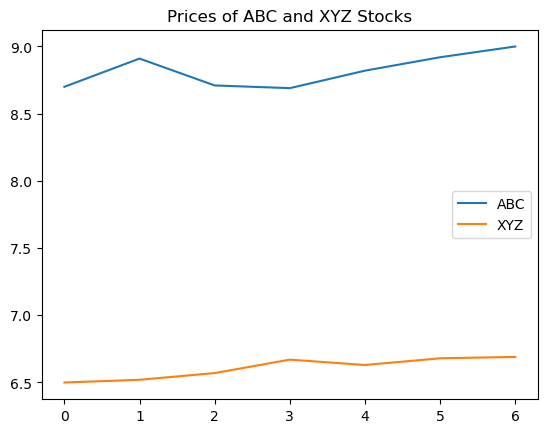

In [21]:
import matplotlib.pyplot as plt
#plots prices
prices.plot()
plt.title("Prices of ABC and XYZ Stocks")
plt.show()

What we've created above is the daily percent change from the last day's data. But what about if we're interested in total change from $t=0$? To get this value, we need to employ two new commands: `pct_change()`, which will give us the percent changes from one entry to the next, and `cumprod()`, which gives the cumulative product up to a row in a DataFrame.

In [23]:
#the factor of how much the stock has multiplied each day
#over the whole time period
(returns+1).cumprod()

,ABC,XYZ
0,NaN,NaN
1,1.024138,1.003077
2,1.001149,1.010769
3,0.998851,1.026154
4,1.013793,1.020000
5,1.025287,1.027692
6,1.034483,1.029231


Text(0.5, 1.0, 'Cumulative Returns of ABC and XYZ Stocks')

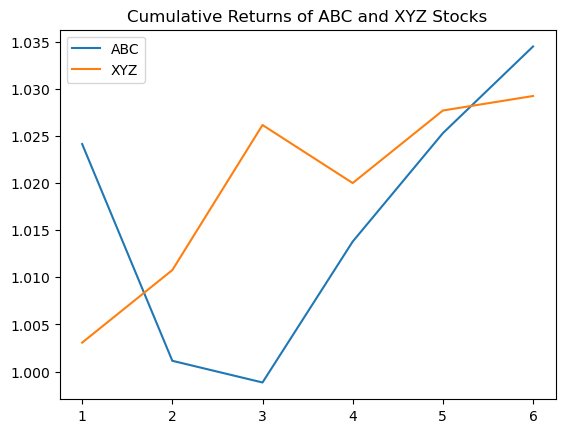

In [24]:
(returns+1).cumprod().plot()
plt.title("Cumulative Returns of ABC and XYZ Stocks")

To get percent change, subtract 1 from final result

In [25]:
(returns+1).prod()-1

ABC    0.034483
XYZ    0.029231
dtype: float64

In [26]:
#get them as percentages
(((returns+1).prod()-1)*100).round(2)

ABC    3.45
XYZ    2.92
dtype: float64